# __Association Rule__

    This notebook tests the different Association Rules on a Market Basket Dataset that contains 9000+ transactions done by customers for groceries. The task is to implement Associations on the items to see which of them are mostly bought together.

#### __Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apyori import apriori

#### __Loading Datasets__

In [2]:
data = pd.read_csv("./data/Market_Basket.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### __Dataset Information__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
# The maximum amounts of items you can buy at a time as per dataset.

max([len(data.iloc[count]) for count, i in enumerate(data)])

20

#### __Formatting Data__

In [5]:
transactions = [row.dropna().tolist() for index, row in data.iterrows()]
transactions[0:3]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

#### __*Apriori Model*__

In [6]:
rules = apriori(
    transactions = transactions, 
    min_support = 0.001,
    min_confidence = 0.10,
    min_length=2 , 
    max_length=2
)

In [7]:
rules_df = pd.DataFrame([{
    'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2
])

rules_df = rules_df.dropna()
rules_df.head(20)

,From,To,Support,Confidence,Lift
0,almonds,burgers,0.005199,0.254902,2.923577
1,cake,almonds,0.003066,0.150327,1.854607
2,chicken,almonds,0.002400,0.117647,1.961046
3,chocolate,almonds,0.005999,0.294118,1.795099
4,almonds,eggs,0.006532,0.320261,1.782108
5,french fries,almonds,0.004399,0.215686,1.261983
6,almonds,frozen smoothie,0.002800,0.137255,2.167472
7,frozen vegetables,almonds,0.003066,0.150327,1.577065
8,green tea,almonds,0.005066,0.248366,1.879913
9,ground beef,almonds,0.003866,0.189542,1.929116


#### __List Rules with N's__

In [8]:
rules_df = rules_df.sort_values('Support', ascending=False).head(200)

items_i = set(rules_df['From']) | set(rules_df['To'])
imap = {item : i for i, item in enumerate(items_i)}

rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
1172,spaghetti,mineral water,0.059725,0.250559,1.439085,13,6
419,chocolate,mineral water,0.052660,0.321400,1.348332,29,6
585,mineral water,eggs,0.050927,0.283383,1.188845,6,10
1112,mineral water,milk,0.047994,0.370370,1.553774,6,30
973,ground beef,mineral water,0.040928,0.416554,1.747522,31,6
439,chocolate,spaghetti,0.039195,0.239219,1.373952,29,13
990,ground beef,spaghetti,0.039195,0.398915,2.291162,31,13
606,spaghetti,eggs,0.036528,0.203264,1.167446,13,10
559,french fries,eggs,0.036395,0.202522,1.184961,37,10
839,mineral water,frozen vegetables,0.035729,0.374825,1.572463,6,21


#### __Plot the rules__

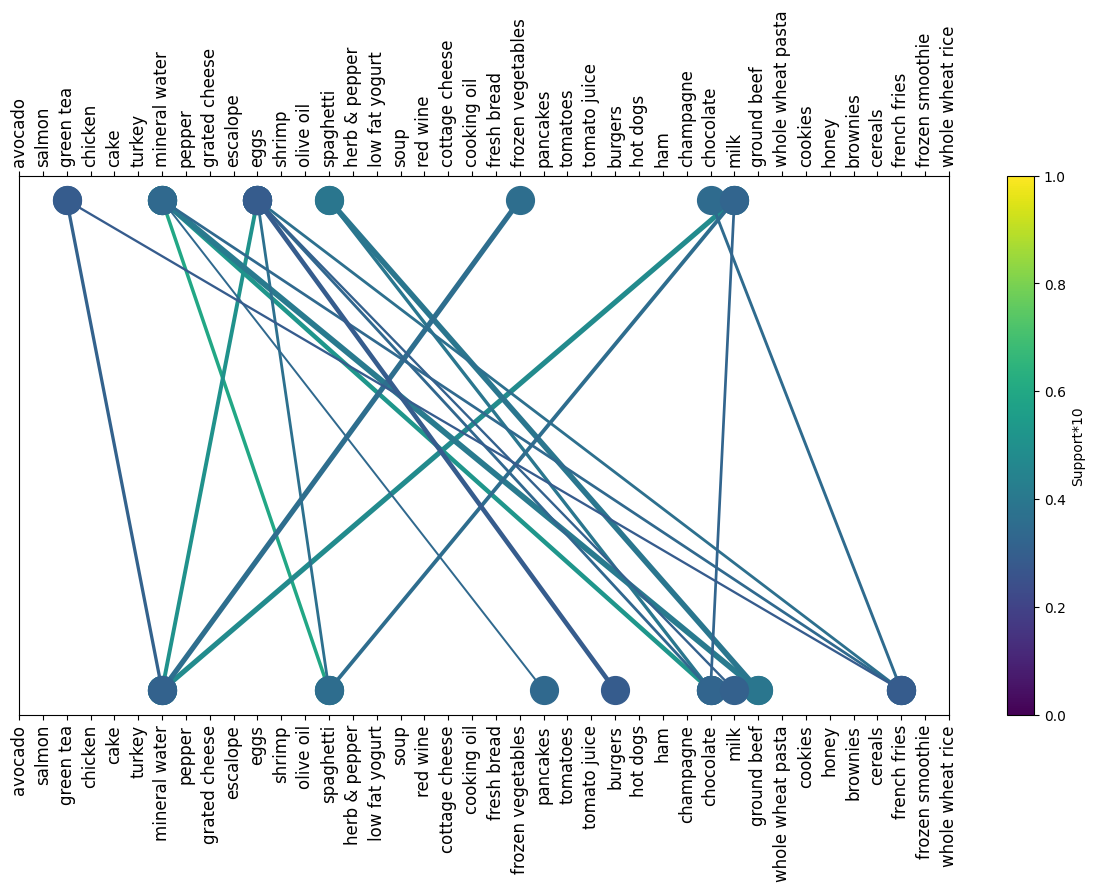

In [9]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=(15, 7))
plt.xticks(range(len(items_i)), items_i, rotation='vertical', fontsize=12)

for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
            c=plt.cm.viridis(row['Support'] * 10),
            markersize=20,
            lw=row['Confidence']*10)
    
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca())
cb.set_label('Support*10')

plt.xticks(range(len(items_i)), items_i, rotation='vertical')
plt.yticks([])
plt.show()